# MARKET ANALYSIS

Deze analyse beantwoord de vraag: 
"welke markten zijn financieel aantrekkelijker"



In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels
import matplotlib.pyplot as plt
import math

df= pd.read_csv('DataCoSupplyChainDataset.csv', encoding='latin1')

print(df.head())


       Type  Days for shipping (real)  Days for shipment (scheduled)  \
0     DEBIT                         3                              4   
1  TRANSFER                         5                              4   
2      CASH                         4                              4   
3     DEBIT                         3                              4   
4   PAYMENT                         2                              4   

   Benefit per order  Sales per customer   Delivery Status  \
0          91.250000          314.640015  Advance shipping   
1        -249.089996          311.359985     Late delivery   
2        -247.779999          309.720001  Shipping on time   
3          22.860001          304.809998  Advance shipping   
4         134.210007          298.250000  Advance shipping   

   Late_delivery_risk  Category Id   Category Name Customer City  ...  \
0                   0           73  Sporting Goods        Caguas  ...   
1                   1           73  Sporting Goo

De eerste stap is kijken of er missende data is, of dat data in een andere form moet om er mee te kunnen werken. Door .describe te gebruiken zien we de count van alle columns, zo zien we dat alle columns 180519 count hebben, op order zipcode (24840) na. Aangezien minder dan 15% van de data een order zipcode heeft, en er geen goede beredenering is om deze te vinden, is het verstandig om order zipcode niet te gebruiken.

In [2]:
print(df.describe(include='all'))

print(df.dtypes)

          Type  Days for shipping (real)  Days for shipment (scheduled)  \
count   180519             180519.000000                  180519.000000   
unique       4                       NaN                            NaN   
top      DEBIT                       NaN                            NaN   
freq     69295                       NaN                            NaN   
mean       NaN                  3.497654                       2.931847   
std        NaN                  1.623722                       1.374449   
min        NaN                  0.000000                       0.000000   
25%        NaN                  2.000000                       2.000000   
50%        NaN                  3.000000                       4.000000   
75%        NaN                  5.000000                       4.000000   
max        NaN                  6.000000                       4.000000   

        Benefit per order  Sales per customer Delivery Status  \
count       180519.000000       18

In deze stap kijken we of de data in de juiste form staat zodat we er meteen mee aan de slag kunnen

In [3]:
print(df.dtypes)

Type                              object
Days for shipping (real)           int64
Days for shipment (scheduled)      int64
Benefit per order                float64
Sales per customer               float64
Delivery Status                   object
Late_delivery_risk                 int64
Category Id                        int64
Category Name                     object
Customer City                     object
Customer Country                  object
Customer Email                    object
Customer Fname                    object
Customer Id                        int64
Customer Lname                    object
Customer Password                 object
Customer Segment                  object
Customer State                    object
Customer Street                   object
Customer Zipcode                 float64
Department Id                      int64
Department Name                   object
Latitude                         float64
Longitude                        float64
Market          

In [4]:
columns_to_change_object = [ 'Category Id', 'Customer Id', 'Customer Zipcode', 'Department Id', 'Order Customer Id', 'Order Id', 'Order Item Cardprod Id', 'Order Item Id','Order Zipcode','Product Card Id', 'Product Category Id','Product Description']
columns_to_change_date = ['order date (DateOrders)','shipping date (DateOrders)']                 
columns_to_change_bool = ['Product Status', 'Late_delivery_risk']
columns_to_change_category = ["Type",'Delivery Status','Category Name','Customer Country','Customer Segment','Customer State','Department Name','Market','Order Country','Order Region','Order Status','Shipping Mode'  ]

def to_object(df,columns_to_change_object,columns_to_change_date,columns_to_change_bool,columns_to_change_category):
    for column in columns_to_change_object: 
        if column in df:
            df[column] = df[column].astype("object")
    for column in columns_to_change_date:
        if column in df:
            df[column] = pd.to_datetime(df[column])
    for column in columns_to_change_bool:
        if column in df:
            df[column] = df[column].astype("bool")
    for column in columns_to_change_category: 
        if column in df:
            df[column] = df[column].astype("category")

    
    
    
print(to_object(df,columns_to_change_object, columns_to_change_date,columns_to_change_bool,columns_to_change_category))  



print(df.dtypes)

None
Type                                   category
Days for shipping (real)                  int64
Days for shipment (scheduled)             int64
Benefit per order                       float64
Sales per customer                      float64
Delivery Status                        category
Late_delivery_risk                         bool
Category Id                              object
Category Name                          category
Customer City                            object
Customer Country                       category
Customer Email                           object
Customer Fname                           object
Customer Id                              object
Customer Lname                           object
Customer Password                        object
Customer Segment                       category
Customer State                         category
Customer Street                          object
Customer Zipcode                         object
Department Id                      

De belangrijkste data staat in de juiste format. Maar, het is een redelijk grote dataset, en is het daar om geen slecht idee om mijn 8 jaar oude pc wat ruimte te bieden door wat irrelevante columns te verwijderen. Daarnaast is het belangrijk om de data op te schonen, zo dat er geen extra spaties of nummers bij staan. Door .nunique() en .unique() te gebruiken zien we of er wellicht een extra spatie bij staat en voorkomen we een extra klassificatie met gelijke betekenis. 

In [5]:
print(df.columns)

del df['Category Id'],df['Customer City'],df['Customer Email'], df['Customer Fname'],df['Customer Lname'], df['Customer Password'], df['Customer Street'], df['Customer Zipcode'],df['Order Customer Id'],df['Order Item Cardprod Id'],df['Order Zipcode'],df['Product Card Id'],df['Product Category Id'], df['Product Description'],df['Product Image'], 

print(df.columns)

Index(['Type', 'Days for shipping (real)', 'Days for shipment (scheduled)',
       'Benefit per order', 'Sales per customer', 'Delivery Status',
       'Late_delivery_risk', 'Category Id', 'Category Name', 'Customer City',
       'Customer Country', 'Customer Email', 'Customer Fname', 'Customer Id',
       'Customer Lname', 'Customer Password', 'Customer Segment',
       'Customer State', 'Customer Street', 'Customer Zipcode',
       'Department Id', 'Department Name', 'Latitude', 'Longitude', 'Market',
       'Order City', 'Order Country', 'Order Customer Id',
       'order date (DateOrders)', 'Order Id', 'Order Item Cardprod Id',
       'Order Item Discount', 'Order Item Discount Rate', 'Order Item Id',
       'Order Item Product Price', 'Order Item Profit Ratio',
       'Order Item Quantity', 'Sales', 'Order Item Total',
       'Order Profit Per Order', 'Order Region', 'Order State', 'Order Status',
       'Order Zipcode', 'Product Card Id', 'Product Category Id',
       'Product De

In [6]:
df.columns = df.columns.str.title()
df.Type = df.Type.str.title()




In [7]:
columns = df.columns

def column_count(df,columns):
    for column in columns: 
        if column in df:
            print('--------')
            print(column)
            print(df[column].nunique())
            print(df[column].unique())
print(column_count(df,columns))

--------
Type
4
['Debit' 'Transfer' 'Cash' 'Payment']
--------
Days For Shipping (Real)
7
[3 5 4 2 6 0 1]
--------
Days For Shipment (Scheduled)
4
[4 1 2 0]
--------
Benefit Per Order
21998
[  91.25      -249.0899963 -247.7799988 ... -103.9700012 -237.5899963
 -337.1000061]
--------
Sales Per Customer
2927
[314.6400146 311.3599854 309.7200012 ... 298.769989  403.7099915
 474.7600098]
--------
Delivery Status
4
['Advance shipping', 'Late delivery', 'Shipping on time', 'Shipping canceled']
Categories (4, object): ['Advance shipping', 'Late delivery', 'Shipping canceled', 'Shipping on time']
--------
Late_Delivery_Risk
2
[False  True]
--------
Category Name
50
['Sporting Goods', 'Cleats', 'Shop By Sport', 'Women's Apparel', 'Electronics', ..., 'Women's Golf Clubs', 'Men's Golf Clubs', 'Toys', 'Water Sports', 'Indoor/Outdoor Games']
Length: 50
Categories (50, object): ['Accessories', 'As Seen on  TV!', 'Baby ', 'Baseball & Softball', ..., 'Water Sports', 'Women's Apparel', 'Women's Clothin

['Java Occidental' 'Rajastán' 'Queensland' ... 'Bistrita-Nasaud' 'Tottori'
 'Khorezm']
--------
Order Status
9
['COMPLETE', 'PENDING', 'CLOSED', 'PENDING_PAYMENT', 'CANCELED', 'PROCESSING', 'SUSPECTED_FRAUD', 'ON_HOLD', 'PAYMENT_REVIEW']
Categories (9, object): ['CANCELED', 'CLOSED', 'COMPLETE', 'ON_HOLD', ..., 'PENDING', 'PENDING_PAYMENT', 'PROCESSING', 'SUSPECTED_FRAUD']
--------
Product Name
118
['Smart watch ' 'Perfect Fitness Perfect Rip Deck'
 "Under Armour Girls' Toddler Spine Surge Runni"
 "Nike Men's Dri-FIT Victory Golf Polo"
 "Under Armour Men's Compression EV SL Slide"
 "Under Armour Women's Micro G Skulpt Running S"
 "Nike Men's Free 5.0+ Running Shoe"
 "Glove It Women's Mod Oval 3-Zip Carry All Gol"
 'Bridgestone e6 Straight Distance NFL San Dieg'
 "Columbia Men's PFG Anchor Tough T-Shirt" 'Titleist Pro V1x Golf Balls'
 'Bridgestone e6 Straight Distance NFL Tennesse'
 'Polar FT4 Heart Rate Monitor' 'ENO Atlas Hammock Straps'
 "adidas Men's F10 Messi TRX FG Soccer Cleat"
 

Hier gaan we beginnen met de echte analyse.

De vraag:
We starten met de vraag "Waar komen onze klanten vandaan?".

Visualizatie keuzes:
Om deze vraag te onderzoeken kijk ik naar de hoeveelheid klanten uit de regio's maar ook de sales. Alhoewel een piechart een omstreden visualizatie is, kies ik er voor om deze wel te gebruiken omdat er een gelimiteerde hoeveelheid categorien zijn en de data duidelijk wordt vergeleken.

Visualizatie omschrijving:
De eerste grafiek kijkt naar de proportie orders per markt. Om te kijken waar de klanten vandaan komen kijken we in eerste instantie naar waar de orders naar toe gaan. Zo zien we dat LATAM het grootste aandeel heeft en Africa de kleinste. Verder valt op dat 75% van de orders naar Pacific Asia, Europe en LATAM gaan.  De tweede grafiek kijkt naar de sales. Zo zien we dat Europe eigenlijk de enige is waarbij het aandeel stijgt (met 2%punten) en de andere regio's aandelen dalen. Dit zou kunnen komen doordat Europa bv. duurdere producten koopt.



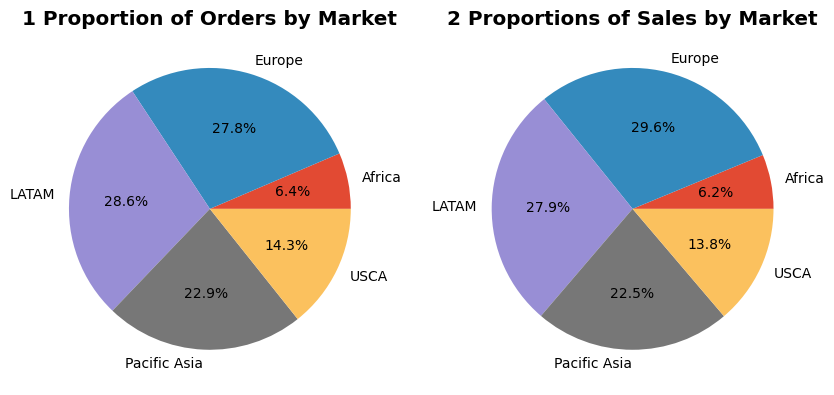

In [69]:
proportions_o = df.groupby('Market')['Order Id'].count()
proportions_s = df.groupby('Market')['Sales'].sum()
labels = proportions_s.index

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

ax1.pie(proportions_o, labels = labels, autopct='%1.1f%%', textprops = {'color': 'black'},)
ax1.set_title('1 Proportion of Orders by Market', fontweight='bold')

ax2.pie(proportions_s, labels = labels, autopct='%1.1f%%', textprops = {'color': 'black'},)
ax2.set_title('2 Proportions of Sales by Market', fontweight='bold')

ax1.set_ylabel('')
ax2.set_ylabel('')

plt.show()

de vraag:
"Verschillen shipping costs op basis van lokaties?"

de visualizatie:
bar chart

om te kijken waar de klanten vandaan komen kijken we in eerste instantie naar de proportie van de orders en waar die orders naar toe gaan. zo zien we dat LATAM het grootste aandeel heeft en Africa de kleinste. Verder valt op dat 75% van de orders naar Pacific Asia, Europe en LATAM gaan.  De tweede grafiek kijkt naar de sales. Zo zien we dat Europe eigenlijk de enige waarbij het aandeel stijgt (met 2%punten) en de andere regio's aandelen dalen. Dit zou kunnen komen doordat Europa duurdere producten koopt.


Vraag
"Verkopen bepaalde producten beter dan andere in bepaalde markten?"

visualizatie 
Alhoewel product type of category diepere informatie geeft heb ik er voor gekozen om departments te gebruiken omdat er 11 departments zijn en 50 product categories en 118 product names. Op het moment dat 3 variabelen gebruikt worden in een visualizatie is het essentieel om overzicht te houden. Een heatmap kan dit duidelijk vertonen, zonder dat het overzicht verloren wordt. Het geeft in een oogopslag een idee welke markten goed werken met welke producten. Voor de nodige nuance in de cijfers heb ik een zelfde heatmap gemaakt voor "benefit per order". 

uitleg
De Total Sales tabel laat zien welke departments goed verkopen in welke regios. Grijze vakken betekend dat er niets is verkocht van de dusdanige department in die regio, rood is relatief weinig, geel gemiddeld en groen relatief veel. Wat opvalt aan de tabel is dat:
- Book shop, Disc Shop, Fitness, en Pet shop weinig verkopen;
- Fan Shop en Apparel veel verkopen;
- Africa beneden par presteert bij vrijwel alle departments en dat,
- Pacific Asia de enige locatie is waar alle departments actief zijn. 

Als we de vorige statements mee nemen naar de volgende tabel Average Benefit per Order, die laat zien wat de gemiddelde winst is per order, dan zien we dat:
- Book shop , Disc shop en Pet Shop minimale profit marges hebben
- Fitness geen slechte profit marges heeft
- Fan Shop en Footwear goede profit marges hebben
- Apparel onder gemiddeld presteert
- Technology zo'n 3x beter presteerd dan zijn opvolger
- Africa geen lagere marges heeft dan andere regio's


Advies:
- drop Book Shop en Discs Shop en kijk of er een toekomst ligt in Pet Shop. Er wordt weinig verkocht en er zit een minimale marge. Daarnaast worden van boeken en discs niet verwacht dat die in de toekomst een comeback maken, marges zouden dus in de toekomst nog verder kunnen dalen. Bij Pet Shop moet het anders, als er niet een manier wordt gevonden om meer omzet en een grotere marge te creeren dan zou hij er eventueel ook uit moeten.
- Technology heeft een extreem grote marge. breid deze uit naar de andere markten en vergroot de total sales, zelfs als dat ten koste gaat van een beetje marge.
- Africa verkoopt niet veel maar heeft prima marges. kijk of je daar nieuwe segmenten kan aanspreken of dat je nieuwe verkoop kanalen kan vinden. Verder kan je kijken of je specifieke departments (zoals Outdoors of Fitness) kan laten vallen om te focussen op de succesvollere.
- Kijk of er manieren zijn om de sales van fitness omhoog te krijgen.
- Apparel verkoopt veel maar de marge is relatief klein, kijk naar hoe je die groter krijgt.
- Zorg dat de Fan Shop niet achteruit gaat, het is een lucratieve markt, die nodig is.


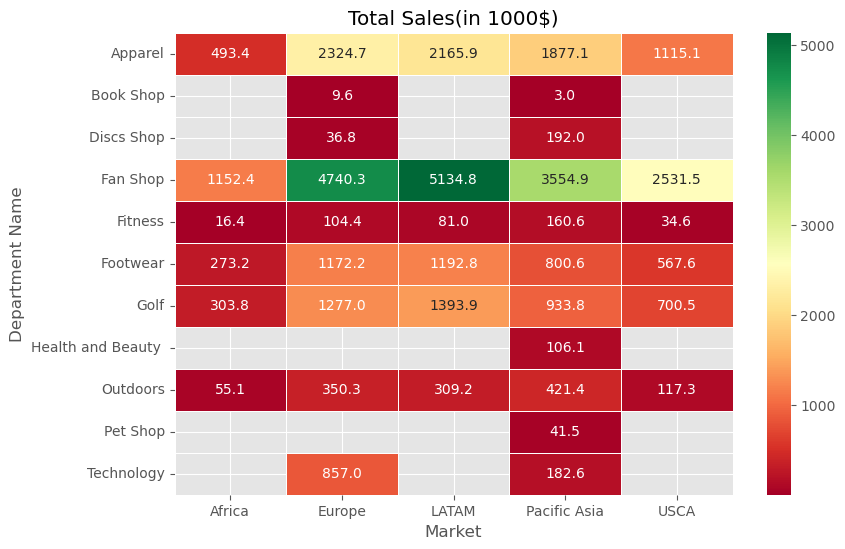

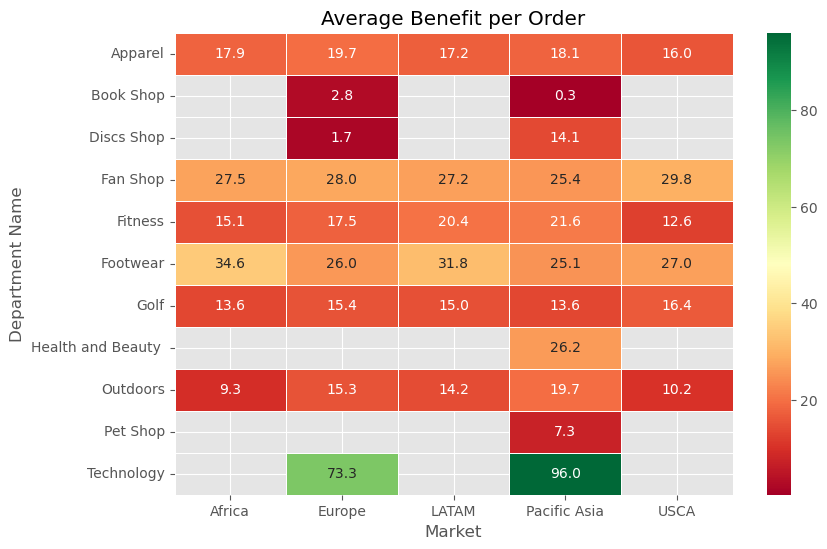

In [10]:
pivot_sales_df = df.pivot_table(index = 'Department Name', columns = 'Market', values = 'Sales', aggfunc = 'sum')
pivot_sales_df = pivot_sales_df.round(1)
pivot_sales_df = pivot_sales_df / 1000
pivot_sales_df.fillna(0, inplace=True)

f, ax = plt.subplots(figsize=(9, 6))
mask = pivot_sales_df == 0
sns.heatmap(pivot_sales_df,  cmap='RdYlGn', linewidths=0.5, annot =True, fmt=".1f", mask=mask)
ax.set_title('Total Sales(in 1000$)')
plt.show()

pivot_profit_df = df.pivot_table(index = 'Department Name', columns = 'Market', values = 'Benefit Per Order', aggfunc = 'mean')
pivot_profit_df = pivot_profit_df.round(1)
pivot_profit_df.fillna(0, inplace=True)

f, ax = plt.subplots(figsize=(9, 6))
mask = pivot_profit_df == 0
sns.heatmap(pivot_profit_df,  cmap='RdYlGn', linewidths=0.5, annot =True, fmt=".1f", mask=mask)
ax.set_title('Average Benefit per Order')
plt.show()


De vraag:
wat kost een order in verschillende regios.

visualizatie
Er is gekozen voor om de regios en sales te representeren in boxplots. we willen zien hoeveel een order kost, nu hoeft dat niet zo specifiek als in een histogram. een boxplot geeft ons genoeg informatie en maakt het vergelijken van regios makkelijker. Daarnaast is er voor gekozen om de sales bij 750 af te snijden, er zijn een aantal outlayers die de schaal te hoog maken om nog een waardige visuele vergelijking te doen.

omschrijving
deze grafiek omschrijft de sales per regio. Het valt op dat de 1st en 3th quartile voor alle markten vrijwel hetzelfde zijn, net als de range. Als uitzondering heeft pacific Asia een iets langere range en europa een iets hogere 1st quartile. Europe, LATAM en Pacific Asia hebben de median op ongeveer hetzelfde punt, Africa en USCA hebben ook vergelijkbare punten. 

De conclusie die we hieruit trekken is dat Europe LATAM en Pacific Asia iets duurdere producten verkopen dan USCA en Africa.

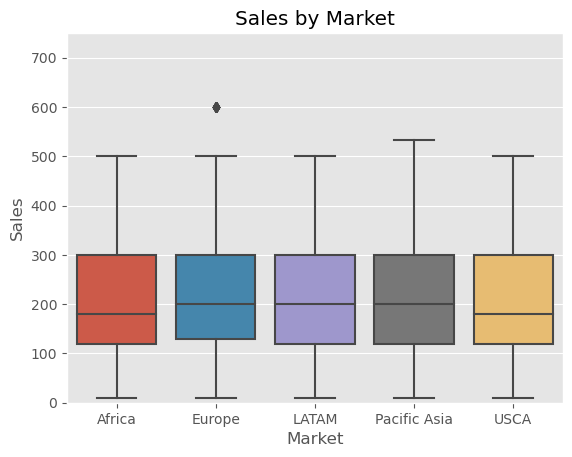

In [11]:
sns.boxplot(data=df, x= 'Market', y = 'Sales')
plt.title("Sales by Market")
plt.xlabel("Market")
plt.ylabel("Sales")
plt.ylim(0,750)

plt.show()



De vraag:
"Welke markt is het meest winstgevend?"

De Visualizatie:
Deze visualizatie laat in absolute cijfers zien welke markt het meeste geld binnenhaalt en wat daar van over blijft. Er is gekozen voor 2 barcharts, de eerste laat het belangrijkste zien: welke markt nou het meeste winst op haalt. De 2e laat een nuance zien van de totale sales. Die nuance is belangrijk doordat het bijvoorbeeld mogelijk zou zijn dat de totale sales relatief hoger liggen dan de profit. In dit scenario zou dat kunnen duiden op extra overhead costs die niet zijn mee gerekend in de benefit per order, en er voor kunnen zorgen dat de totale profit lager ligt.

uitleg:
Deze grafiek laat duidelijk zien dat Europe en lATAM het meest winstgevened zijn. Ook wordt dit beaamd door de tweede grafiek. Verder zien we dat vooral Afrika maar ook USCA relatief weinig verdienen

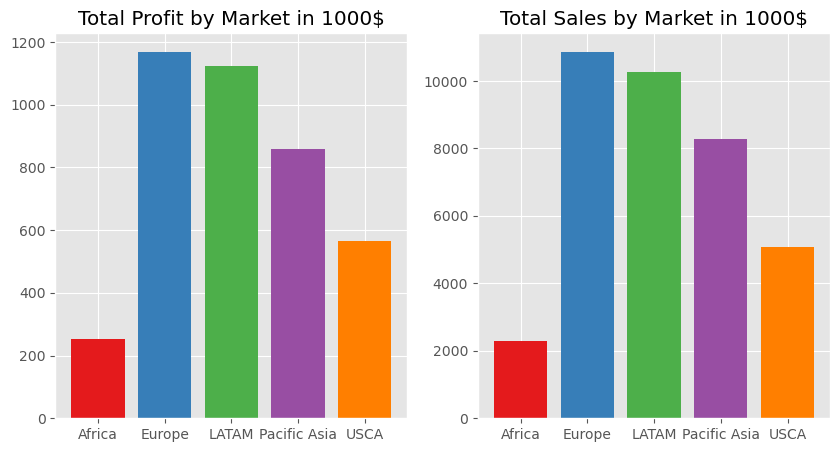

In [57]:


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
market_profit = df.groupby('Market')['Benefit Per Order'].sum()/1000
colors = sns.color_palette("Set1")
ax1.bar(market_profit.index,market_profit, color = colors)
ax1.set_title("Total Profit by Market in 1000$")
ax1.ticklabel_format(style='plain', axis='y')



market_sales = df.groupby('Market')['Sales'].sum()/1000
colors = sns.color_palette("Set1")
ax2.bar(market_sales.index,market_sales, color = colors)
ax2.set_title("Total Sales by Market in 1000$")
ax2.ticklabel_format(style='plain', axis='y')

plt.show()



Conclusie

Uit deze analyse kunnen we opmaken dat er geen grote verschillen liggen tussen de omzet en de hoeveelheid orders per lokatie. Europa is de enige regio die relatief meer omzet heeft in vergelijking met de hoeveelheid orders, de andere regios hebben een kleiner aandeel, wat bv zou kunnen komen door duurdere producten. Dit wordt ook beaamt door de verdeling van sales; we zien dat de markten Europe, LATAM en Pacific Asia gemiddeld duurdere producten verkopen dan USCA en Africa. Daarnaast liggen er ook verschillen in de departments in de markten. Zo presteren Book Shop, Disc Shop en Pet shop beneden par en presteren Technology en Fan Shop boven gemiddeld. In absolute cijfers zijn Europe en LATAM het meest winstgevend, Africa en USCA het minste.

Om tot een conclusie te komen met de vraag "welke markt is het financieel antrekkelijkst?" We zien dat Europa en LATAM het beste presteren op gebied van winst, sales en de hoeveelheid orders, daarom zijn deze twee markten het financieel aantrekkelijkst. Daarnaast liggen in Africa nog veel kansen, door te focussen op de departments die het meest winstegevend zijn, en te kijken naar nieuwe verkoop kanalen en segmenten zou Africa zeker veel potentie kunnen bieden. Verder moeten de departments die niet lucratief genoeg zijn uit het assortiment worden gehaald, en moet Technology uitgebreid worden naar andere markten.